Tupro 3 Pengantar Kecerdasan Buatan (k-*Nearest Neighbor*)

Kelompok 12 IF-43-05

- Mayang Sari (1301194227)

- Tsaqib Sayyidan Sendjaja (1301193450)

#Import Library

In [1]:
import pandas as pd
import math

#Read Data

In [2]:
!gdown --id 1QpSruikrjkfW4ccChW4j6EnCPJ0ndVUq

Downloading...
From: https://drive.google.com/uc?id=1QpSruikrjkfW4ccChW4j6EnCPJ0ndVUq
To: /content/mobil.xls
100% 29.2k/29.2k [00:00<00:00, 51.8MB/s]


In [ ]:
data = pd.read_excel('mobil.xls')
data

,Nama Mobil,Ukuran,Kenyamanan,Irit,Kecepatan,Harga (Ratus Juta)
0,Toyota Agya,4,4,9,6,1.00
1,Daihatsu Alya,4,3,9,6,1.10
2,Toyota Avanza,6,5,6,6,2.00
3,Daihatsu Xenia,6,4,6,6,1.75
4,Xpander,7,7,6,7,2.25
5,Livina,7,7,6,7,2.10
6,Karimun,3,4,10,5,1.20
7,Toyota Innova,8,8,5,7,4.00
8,Alphard,9,10,4,8,10.00
9,Toyota Vios,5,7,9,8,2.50


#Preprocessing Data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ukuran,17.0,6.529412,2.034627,3.0,5.00,7.0,8.0,10.0
Kenyamanan,17.0,6.352941,2.234423,3.0,4.00,7.0,8.0,10.0
Irit,17.0,6.941176,1.784327,4.0,6.00,7.0,9.0,10.0
Kecepatan,17.0,6.823529,1.131111,5.0,6.00,7.0,8.0,9.0
Harga (Ratus Juta),17.0,3.247059,2.406597,0.8,1.75,2.3,5.0,10.0


In [ ]:
pd.DataFrame(data.isnull().sum())

,0
Nama Mobil,0
Ukuran,0
Kenyamanan,0
Irit,0
Kecepatan,0
Harga (Ratus Juta),0


In [ ]:
data.duplicated().sum()

0

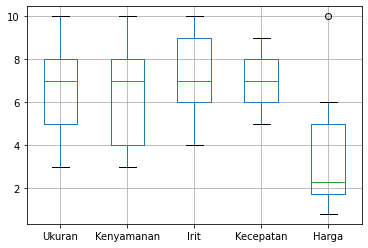

In [ ]:
df_copy = data.copy()
df_copy.rename(columns={'Harga (Ratus Juta)':'Harga'}, inplace=True)
boxplot = df_copy.boxplot(column=['Ukuran', 'Kenyamanan', 'Irit', 'Kecepatan', 'Harga'])

#Distance Calculations

In [ ]:
#Euclidean distance
def euclidean_distance():
  result = []
  for i in range(len(data)):
      hasil_ukuran = (masukkan[0]-float(ukuran[i]))**2
      hasil_kenyamanan = (masukkan[1]-float(kenyamanan[i]))**2
      hasil_irit = (masukkan[2]-float(irit[i]))**2
      hasil_kecepatan = (masukkan[3]-float(kecepatan[i]))**2
      hasil_harga = (masukkan[4]-float(harga[i]))**2
      hasil = math.sqrt(hasil_ukuran+hasil_kenyamanan+hasil_irit+hasil_kecepatan+hasil_harga)
      result.append([data['Nama Mobil'][i], hasil])
  return result

In [ ]:
#Manhattan distance
def manhattan_distance():
  result = []
  for i in range(len(data)):
      hasil_ukuran = math.fabs(masukkan[0]-float(ukuran[i]))
      hasil_kenyamanan = math.fabs(masukkan[1]-float(kenyamanan[i]))
      hasil_irit = math.fabs(masukkan[2]-float(irit[i]))
      hasil_kecepatan = math.fabs(masukkan[3]-float(kecepatan[i]))
      hasil_harga = math.fabs(masukkan[4]-float(harga[i]))
      hasil = hasil_ukuran+hasil_kenyamanan+hasil_irit+hasil_kecepatan+hasil_harga
      result.append([data['Nama Mobil'][i], hasil])
  return result

In [ ]:
#minkowski distance
def minkowski_distance():
  p = 4
  result = []
  for i in range(len(data)):
    hasil_ukuran = math.pow((math.fabs(masukkan[0]-float(ukuran[i]))), p)
    hasil_kenyamanan = math.pow((math.fabs(masukkan[1]-float(kenyamanan[i]))), p)
    hasil_irit = math.pow((math.fabs(masukkan[2]-float(irit[i]))), p)
    hasil_kecepatan = math.pow((math.fabs(masukkan[3]-float(kecepatan[i]))), p)
    hasil_harga = math.pow((math.fabs(masukkan[4]-float(harga[i]))), p)
    hasil = math.pow((hasil_ukuran+hasil_kenyamanan+hasil_irit+hasil_kecepatan+hasil_harga), 1/p)
    result.append([data['Nama Mobil'][i], hasil])
  return result

In [ ]:
#supremum/chebyshev distance
def supremum_distance():
  result = []
  for i in range(len(data)):
    hasil_ukuran = math.fabs(masukkan[0]-float(ukuran[i]))
    hasil_kenyamanan = math.fabs(masukkan[1]-float(kenyamanan[i]))
    hasil_irit = math.fabs(masukkan[2]-float(irit[i]))
    hasil_kecepatan = math.fabs(masukkan[3]-float(kecepatan[i]))
    hasil_harga = math.fabs(masukkan[4]-float(harga[i]))
    hasil = max(hasil_ukuran, hasil_kenyamanan, hasil_irit, hasil_kecepatan, hasil_harga)
    result.append ([data['Nama Mobil'][i], hasil])
  return result

In [ ]:
# get all distances with sorted value, to get the minimum
# ascending sort based on the distance value (kecil - besar)
def get_all_distances():
  hasil_euclid = sorted(euclidean_distance(), key=lambda x: x[1])
  hasil_manhattan = sorted(manhattan_distance(), key=lambda x: x[1])
  hasil_minkowski = sorted(minkowski_distance(), key=lambda x: x[1])
  hasil_supremum = sorted(supremum_distance(), key=lambda x: x[1])
  return (hasil_euclid, hasil_manhattan, hasil_minkowski, hasil_supremum)

#Main Program

In [ ]:
#Main Program
ukuran = []
kenyamanan = []
irit = []
kecepatan = []
harga = []
for i in range(len(data)):
  ukuran.append(data['Ukuran'][i])
  kenyamanan.append(data['Kenyamanan'][i])
  irit.append(data['Irit'][i])
  kecepatan.append(data['Kecepatan'][i])
  harga.append(data['Harga (Ratus Juta)'][i])

print('-----Masukkan nilai karakteristik mobil yang Anda inginkan-----\n')
masukkan = []
for i in range(5):
  if i == 0:
    x = float(input('Masukkan Ukuran: '))
  if i == 1:
    x = float(input('Masukkan Kenyamanan: '))
  if i == 2:
    x = float(input('Masukkan Irit: '))
  if i == 3:
    x = float(input('Masukkan Kecepatan: '))
  if i == 4:
    x = float(input('Masukkan Harga: '))
  masukkan.append(x)

hasil_euclid, hasil_manhattan, hasil_minkowski, hasil_supremum = get_all_distances()

# get best three, from kNN: give  value equal to 3. 
k = 3

print('\n===========Best Three Car from Each Distance Calculations===========')
print('\nEuclidean Method')
for i in range(k):
  print(i+1, hasil_euclid[i])

print('\nManhattan Method')
for i in range(k):
  print(i+1, hasil_manhattan[i])

print('\nMinkowski Method')
for i in range(k):
  print(i+1, hasil_minkowski[i])

print('\nSupremum Method')
for i in range(k):
  print(i+1, hasil_supremum[i])

#convert car recommendation data to .xlsx file
car_rec = (hasil_euclid[0][0], hasil_euclid[1][0], hasil_euclid[2][0])
final_data = pd.DataFrame(car_rec)
final_data.columns = ['Nama Mobil']
final_data.to_excel('rekomendasi.xlsx', index=False)
print('\n***Final Car Recommendation Data***')
final_data

-----Masukkan nilai karakteristik mobil yang Anda inginkan-----

Masukkan Ukuran: 1
Masukkan Kenyamanan: 2
Masukkan Irit: 3
Masukkan Kecepatan: 4
Masukkan Harga: 5

===========Best Three Car from Each Distance Calculations===========

Euclidean Method
1 ['Daihatsu Xenia', 7.25]
2 ['Toyota Avanza', 7.483314773547883]
3 ['Daihatsu Alya', 8.075270893288968]

Manhattan Method
1 ['Daihatsu Xenia', 15.25]
2 ['Karimun', 15.8]
3 ['Daihatsu Alya', 15.9]

Minkowski Method
1 ['Daihatsu Xenia', 5.398826025555485]
2 ['Toyota Avanza', 5.4527183582720475]
3 ['Daihatsu Alya', 6.34945324817741]

Supremum Method
1 ['Toyota Avanza', 5.0]
2 ['Daihatsu Xenia', 5.0]
3 ['Toyota Agya', 6.0]

***Final Car Recommendation Data***


,Nama Mobil
0,Daihatsu Xenia
1,Toyota Avanza
2,Daihatsu Alya
